In [103]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Prepare the data

In [104]:
X, Y = make_classification(n_samples=50000,
                           n_features=15,
                           n_informative=10,
                           n_redundant=5,
                           n_classes=2,
                           weights=[0.7],
                           class_sep=0.7,
                           random_state=15)

# Split the data

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=15)

# Calculate the Sigmoid

In [106]:
#parameterised method with 
#x:- input data 
#thetha is the lsit of intercept and weights
def sigmoid_fun(x, thetha):
    z = np.dot(x, thetha[1:]) + thetha[0]
    return 1 / (1 + np.exp(-z))

# Loss Function

In [135]:
#y- actual value
# yhat -predicted value
def loss_fun(y, yhat,lambda_val,weights):
    
    return (-(y.dot(np.log(yhat))) - ((1 - y).dot(np.log(1 - yhat))))/len(y)+((lambda_val/2)*weights**2)



In [136]:
def next_batch(x, y, batchSize):

    for i in np.arange(0, x.shape[0], batchSize):

        yield (x[i:i + batchSize], y[i:i + batchSize])

# Calculate the Gradient

In [137]:
import collections


#iterations: - number of epoc
def gradient(x, y, alpha, thetha, epocs, batchSize, lambda_val):

    loss__ = []
    intercept_points = []

    prevoiuse_loss = []
    weights = []

    for epoc in range(epocs):
        epochLoss = []
        epoc_thetha = []
        for (btachX, batchY) in next_batch(x, y, batchSize):

            yhat = sigmoid_fun(btachX, thetha)

            error = yhat - batchY

            grad_ = btachX.T.dot(error) / btachX.shape[0]
            thetha[0] = thetha[0] - alpha * error.sum()
            thetha[1:] = thetha[1:] - alpha * grad_
            res = theta
            epoc_thetha.append(np.array(res))
            loss = loss_fun(batchY, yhat, lambda_val, thetha[1:])

            epochLoss.append(loss)

        loss__.append((np.average(epochLoss)))

        weights.append(np.array(epoc_thetha))

        if collections.Counter(loss__) == collections.Counter(prevoiuse_loss):
            print("Weight isn't updated at epoc ", epoc)
            break

        prevoiuse_loss.append((np.average(epochLoss)))
        intercept_points.append(thetha[0])

    return loss__, intercept_points, weights

# Training data output

In [197]:
import random
m, n = X.shape
theta = np.zeros(1 + n)
batch_size = 1

alpha = 0.0001
num_iter = 20
lambda_value = .0001
train_loss, intercepts_points, weights = gradient(
    X_train, Y_train, alpha, theta, num_iter, batch_size, lambda_value)

In [198]:
def classifier(x, y, weights, batchSize):
    train_loss = []
    for weight in weights:
        loss_ = []
        cnt = 0
        for (btachX, batchY) in next_batch(x, y, batchSize):

            yhat_ = sigmoid_fun(btachX, weight[cnt])
            predict = (yhat_ >= 0.5).astype('int')

            loss = loss_fun(batchY, yhat_, lambda_value, weight[cnt])
            loss_.append((loss))
            cnt += 1
        train_loss.append(np.average(loss_))
    return train_loss

In [199]:
test_loss = classifier(X_test, Y_test, weights, batch_size)

In [200]:
training_loss_ = classifier(X_train, Y_train, weights, batch_size)

# Plotting the curve

In [201]:
def plot_curve(training_loss, test_loss, epoc):

    plt.plot(np.arange(0, epoc),
             training_loss,
             color='orange',
             label='training curve')
    plt.plot(np.arange(0, epoc), test_loss, color='blue', label='test curve')

    plt.xlabel('Epoc')
    plt.ylabel('Loss')
    plt.title('Loss v/s Epoc Curve')
    plt.legend()
    plt.show()

In [202]:
print('\n Logisitc Regression bias(intercept) term :',
      theta[0])
print('\n Logisitc Regression estimated coefficients :',
      theta[1:])
print(
    '\n Logisitc Regression estimated intial loss {} and intial intercept {} for training data'
    .format(training_loss_[0], intercepts_points[0]))
print(
    '\n Logisitc Regression estimated intial loss {} and intial intercept {} for test data'
    .format(test_loss[0], intercepts_points[0]))


 Logisitc Regression bias(intercept) term : -0.8897519363646536

 Logisitc Regression estimated coefficients : [-4.29394720e-01  1.92911534e-01 -1.48319231e-01  3.38095816e-01
 -2.20731195e-01  5.69669874e-01 -4.45186061e-01 -9.00099239e-02
  2.21598222e-01  1.73588007e-01  1.98538394e-01 -4.13171975e-04
 -8.11250058e-02  3.39070549e-01  2.29369065e-02]

 Logisitc Regression estimated intial loss 0.4546059865680958 and intial intercept -0.3151254707872083 for training data

 Logisitc Regression estimated intial loss 0.5252448503390084 and intial intercept -0.3151254707872083 for test data


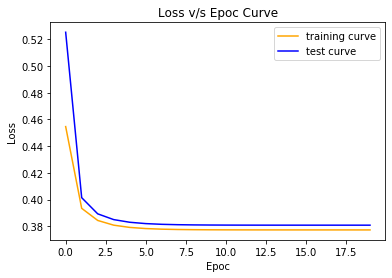

In [203]:
plot_curve(training_loss_,test_loss,num_iter)

# SGDCLASSIFIER USING SKLEARN

In [204]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant',max_iter=20)
clf.fit(X_train,Y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.13 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.13 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=20, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [205]:
weights_=clf.coef_,  
intercept_=clf.intercept_

In [213]:
print('difference between the intercept\n ' , intercept_-theta[0])

difference between the intercept
  [0.03661364]


In [196]:
print('differnce between weights \n', weights_-theta[1:])

differnce between weights 
 [[[ 0.0060278  -0.00743588 -0.00027113  0.00334825  0.01254449
   -0.00950409 -0.00723876 -0.0040782  -0.01232502  0.00725325
   -0.00148649  0.00463233  0.00152131 -0.00054253 -0.0002697 ]]]
